# Purpose: A basic object identification package for the lab to use

*Step 1: import packages*

In [4]:
import os.path as op
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#Sci-kit Image Imports
from skimage import io
from skimage import filters
from skimage.feature import canny
from skimage import measure

from scipy import ndimage as ndi

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

*Step 2: User Inputs*

In [60]:
file_location = '../../31.2_DG_quant.tif'
plot_name = 'practice2.png'

channel_1_color = 'Blue'
channel_2_color = 'Green'

*Step 3: Read the image into the notebook*

In [61]:
#Read in the file
im = io.imread(file_location)

#Convert image to numpy array
imarray = np.array(im)

#Checking the image shape
imarray.shape

(2, 512, 512)

*Step 4: Color Split*

In [62]:
channel_1 = im[0, :, :]
channel_2 = im[1, :, :]

*Step 5: Visualization Check*

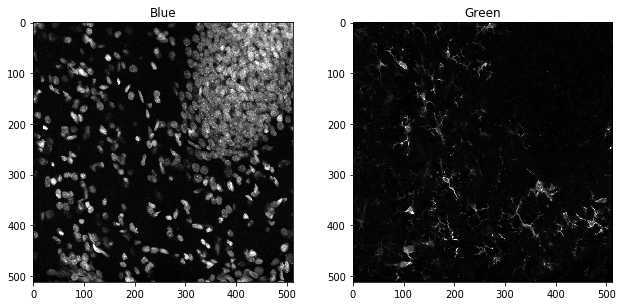

In [63]:
fig = plt.figure()

ax1 = fig.add_subplot(2,2,1)
ax1.set_title(channel_1_color)
ax1.imshow(channel_1, cmap='gray')

ax2 = fig.add_subplot(2,2,2)
ax2.set_title(channel_2_color)
ax2.imshow(channel_2, cmap='gray')

fig.set_size_inches(10.5, 10.5, forward=True)

*Step 6: Apply a Threshold*

In [64]:
threshold_local = filters.threshold_otsu(channel_1)
binary_c1 = channel_1 > threshold_local

threshold_local = filters.threshold_otsu(channel_2)
binary_c2 = channel_2 > threshold_local

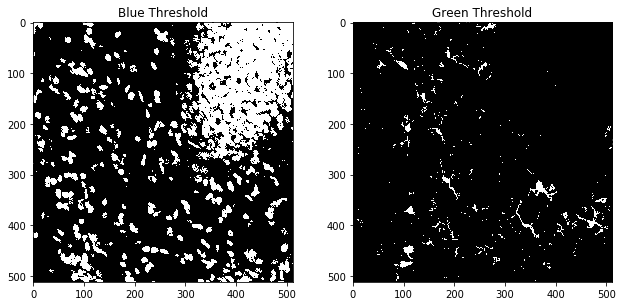

In [65]:
fig = plt.figure()

ax1 = fig.add_subplot(2,2,1)
ax1.set_title(str(channel_1_color + ' Threshold'))
ax1.imshow(binary_c1, cmap='gray')

ax2 = fig.add_subplot(2,2,2)
ax2.set_title(str(channel_2_color + ' Threshold'))
ax2.imshow(binary_c2, cmap='gray')

fig.set_size_inches(10.5, 10.5, forward=True)

*Step 7: Fill in Objects*

In [66]:
filled_c1 = ndi.binary_fill_holes(binary_c1)
filled_c2 = ndi.binary_fill_holes(binary_c2)

*Step 8: Visualization Check*

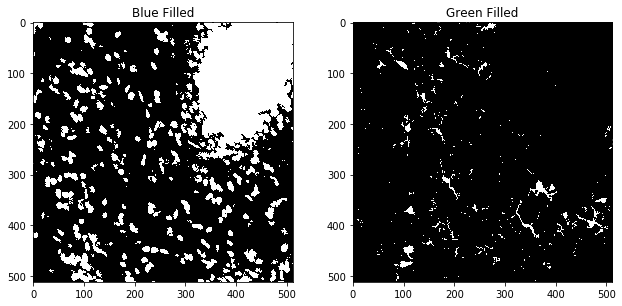

In [67]:
fig = plt.figure()

ax1 = fig.add_subplot(2,2,1)
ax1.set_title(str(channel_1_color + ' Filled'))
ax1.imshow(filled_c1, cmap='gray')

ax2 = fig.add_subplot(2,2,2)
ax2.set_title(str(channel_2_color + ' Filled'))
ax2.imshow(filled_c2, cmap='gray')

fig.set_size_inches(10.5, 10.5, forward=True)

*Step 9: Labeling Objects*

In [68]:
label_objects1, nb_labels1 = ndi.label(filled_c1)
sizes1 = np.bincount(label_objects1.ravel())
mask_sizes1 = sizes1 > 100
mask_sizes1[0] = 0
cells_cleaned_c1 = mask_sizes1[label_objects1]

In [69]:
label_objects2, nb_labels2 = ndi.label(filled_c2)
sizes2 = np.bincount(label_objects2.ravel())
mask_sizes2 = sizes2 > 100
mask_sizes2[0] = 0
cells_cleaned_c2 = mask_sizes2[label_objects2]

In [70]:
labeled_c1, _ = ndi.label(cells_cleaned_c1)
labeled_c2, _ = ndi.label(cells_cleaned_c2)

*Step 10: Visualization Check*

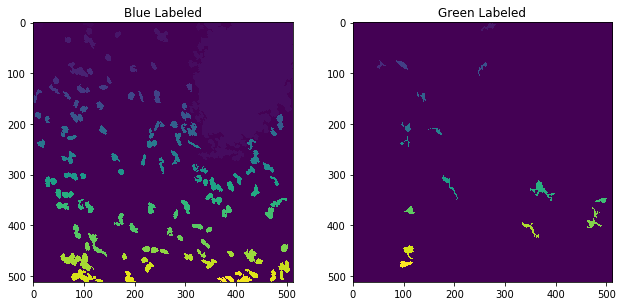

In [73]:
fig = plt.figure()

ax1 = fig.add_subplot(2,2,1)
ax1.set_title(str(channel_1_color + ' Labeled'))
ax1.imshow(labeled_c1)

ax2 = fig.add_subplot(2,2,2)
ax2.set_title(str(channel_2_color + ' Labeled'))
ax2.imshow(labeled_c2)

fig.set_size_inches(10.5, 10.5, forward=True)

*Step 11: Get Region Props*

In [74]:
regionprops_c1 = measure.regionprops(labeled_c1)
regionprops_c2 = measure.regionprops(labeled_c2)

In [75]:
df = pd.DataFrame(columns=['centroid x', 'centroid y','equiv_diam'])
k = 1
for props in regionprops_c1:
    #Get the properties that I need for areas
    #Add them into a pandas dataframe that has the same number of rows as objects detected
    #
    centroid = props.centroid
    centroid_x = centroid[0]
    centroid_y = centroid[1]
    equiv_diam = props.equivalent_diameter
    df.loc[k] = [centroid_x, centroid_y, equiv_diam]
    k = k + 1

In [77]:
df2 = pd.DataFrame(columns=['centroid x', 'centroid y','equiv_diam'])
k = 1
for props in regionprops_c2:
    #Get the properties that I need for areas
    #Add them into a pandas dataframe that has the same number of rows as objects detected
    #
    centroid = props.centroid
    centroid_x = centroid[0]
    centroid_y = centroid[1]
    equiv_diam = props.equivalent_diameter
    df2.loc[k] = [centroid_x, centroid_y, equiv_diam]
    k = k + 1

In [80]:
count_c1 = df.shape[0]
print('Count ' + channel_1_color + ': ' + str(count_c1))

count_c2 = df2.shape[0]
print('Count ' + channel_2_color + ': ' + str(count_c2))

Count Blue: 114
Count Green: 16
